In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import numpy as np

In [17]:
# Loop through all files
files = sorted(os.listdir('training_data/'))
data_years = []
for file in files :
    df = pd.read_csv('training_data/' + file)
    # Standardise ORtg & DRtg columns 
    stdcols = []
    for col in df.columns:
        if ('ORtg' in col) or ('DRtg' in col):
            stdcols.append(col)
    df[stdcols] = StandardScaler().fit_transform(df[stdcols])
    data_years.append(df)
# Assemble data
data = pd.concat(data_years)
data_ = data.copy()
data_ = data_[(data_['G_home'] >= 25) & (data_['G_away'] >= 25) & (data_['Rest_home'] < 10) & (data_['Rest_away'] < 10)]
data_['H2H_home'] = data_['H2H_home'].replace(np.nan, 0.5)

In [23]:
def hist_W_L(data, feature, ax) :

    df_win  = data_.copy().groupby('W_home').get_group(1)
    df_loss = data_.copy().groupby('W_home').get_group(0)

    sns.kdeplot(df_win[feature], label = f'Home win ({round(df_win[feature].mean(), 2)})', ax = ax, color = 'lightgreen', fill = False, linewidth = 2)
    sns.kdeplot(df_loss[feature], label = f'Away win ({round(df_loss[feature].mean(), 2)})', ax = ax, color = 'tomato', fill = False, linewidth = 2)
    ax.tick_params(axis='x', colors = 'white'); ax.set_yticks([])
    ax.set_xlabel(''); ax.set_ylabel('')
    ax.annotate(feature, xy = (0.85, 0.95), rotation = -90, xycoords = 'axes fraction', color = 'white', va = 'top', size = 7)
    ax.grid(linestyle = ':', color = 'white', alpha = 0.5)
    ax.set_facecolor('black')
    ax.spines['bottom'].set_color('white'); ax.spines['top'].set_color('white')
   # ax.legend()

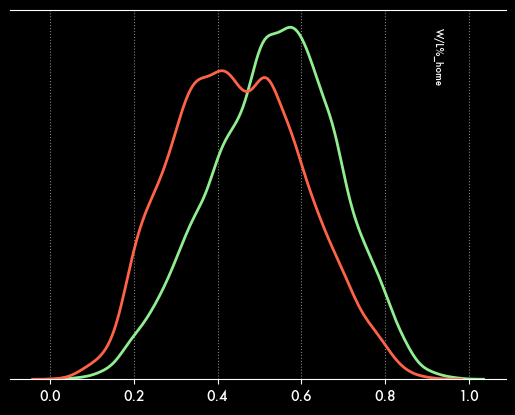

In [24]:
_, ax = plt.subplots(facecolor = 'black')
plt.rcParams['font.family'] = 'futura'
hist_W_L(data, 'W/L%_home', ax)

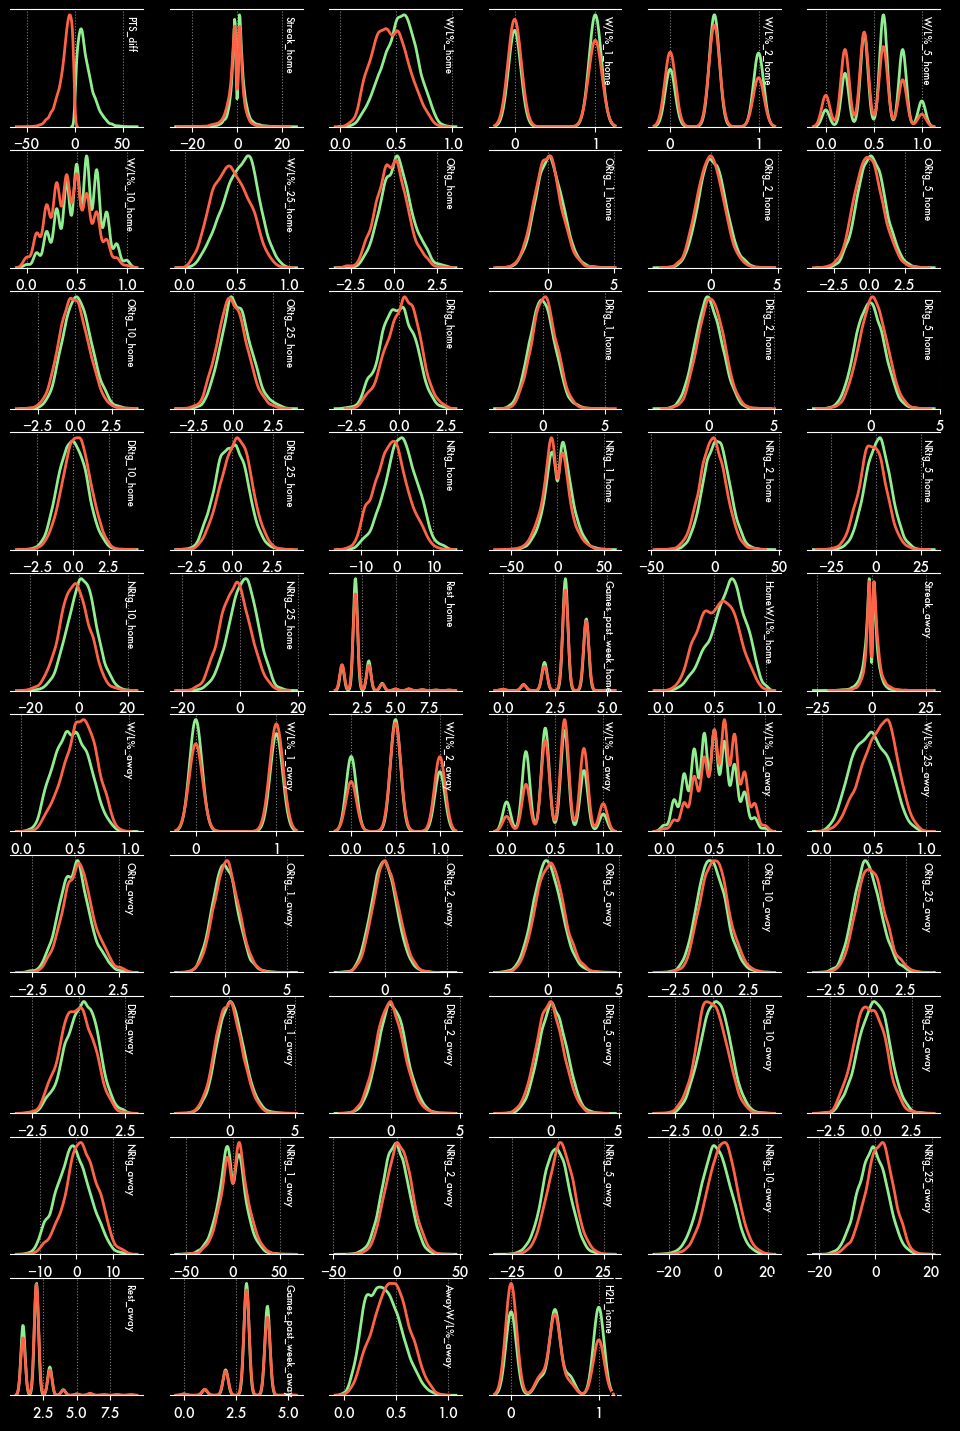

In [25]:
fig, axs = plt.subplots(10, 6, figsize = (12, 18), facecolor = 'black'); axs = axs.flatten()

for i, col in enumerate(data.columns[9:]):
    try:
        hist_W_L(data_, col, axs[i])
    except:
        pass
axs[i+1].set_facecolor('black')
axs[i+2].set_facecolor('black')
plt.show()

Text(0.5, 1.0, 'pr = 0.16795599395303176;     a = 0.005471971626350851')

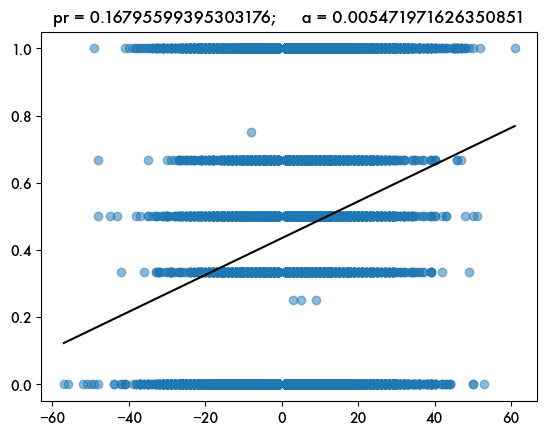

In [137]:
_, axs = plt.subplots()

x = DATA_['PTS_diff']
xlin = np.array([x.min(), x.max()])
y = DATA_['H2H_home']

a, b = np.polyfit(x, y, 1)
ylin = a*xlin + b


plt.scatter(x, y, alpha = 0.5)
plt.plot(xlin, ylin, c = 'black')
plt.title(f'pr = {pearsonr(x, y)[0]};     a = {a}')

In [26]:
featuresInfo = pd.DataFrame(data.columns[9:], columns = ['feature'])

x = data_['PTS_diff']
for f in featuresInfo['feature'] : 
    
    y = data_['H2H_home']

    a, b = np.polyfit(x, y, 1)
    ylin = a*xlin + b


    plt.scatter(x, y, alpha = 0.5)
    plt.plot(xlin, ylin, c = 'black')
    plt.title(f'pr = {pearsonr(x, y)[0]};     a = {a}')

NameError: name 'xlin' is not defined

In [57]:
featuresInfo = pd.DataFrame(data.columns[9:], columns = ['feature'])
featuresInfo['pearsonr'] = featuresInfo['feature'].apply(lambda x: pearsonr(data_['PTS_diff'], data_[x])[0])
featuresInfo['a_coeff']  = featuresInfo['feature'].apply(lambda x: np.polyfit(data_['PTS_diff'], data_[x], 1)[0])
featuresInfo['home']     = featuresInfo['feature'].apply(lambda x: 'green' if 'home' in x else 'red')
featuresInfo = featuresInfo.sort_values('pearsonr', ascending = False).reset_index(drop = True)

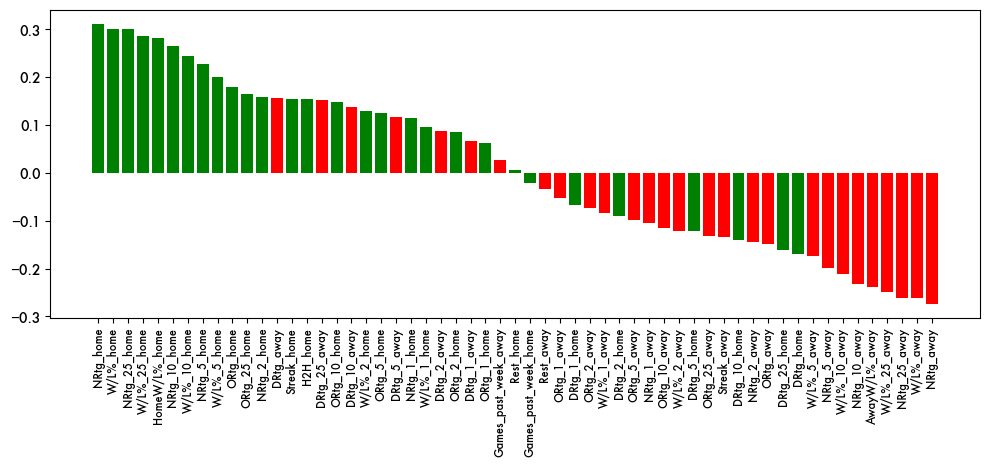

In [58]:
plt.subplots(figsize = (12, 4))
plt.bar(featuresInfo[1:]['feature'], featuresInfo[1:]['pearsonr'], color = featuresInfo[1:]['home'])
plt.xticks(rotation = 90, size = 8)
plt.show()

In [59]:
featuresInfo

,feature,pearsonr,a_coeff,home
0,PTS_diff,1.000000,1.000000,red
1,NRtg_home,0.311545,0.109607,green
2,W/L%_home,0.300772,0.003544,green
3,NRtg_25_home,0.299490,0.114833,green
4,W/L%_25_home,0.285259,0.003696,green
5,HomeW/L%_home,0.281751,0.003752,green
6,NRtg_10_home,0.265625,0.120966,green
7,W/L%_10_home,0.244661,0.003858,green
8,NRtg_5_home,0.227214,0.124438,green
9,W/L%_5_home,0.199360,0.003863,green
